# CODE 06: Listing 5.4 Chebyshev Method  - Pag 125

/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:82: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/david/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in double_scalars


<IPython.core.display.Javascript object>


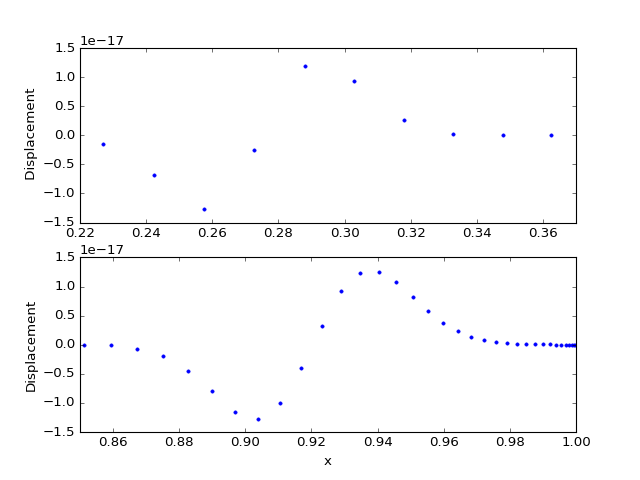

In [1]:
"""
Created on Sat Jan 30 20:01:22 2016
"""
#------------------------------------------------------------------------------
#CHAPTER 5:  The Pseudospectral Method  
#------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from ricker import ricker

# Show the plots in the Notebook.
plt.switch_backend("nbagg")

def get_cheby_matrix(nx):
    cx = np.zeros(nx+1)
    x = np.zeros(nx+1)
    for ix in range(0,nx+1):
        x[ix] = np.cos(np.pi * ix / nx)
   
    cx[0] = 2.
    cx[nx] = 2.
    cx[1:nx] = 1.
   
    D = np.zeros((nx+1,nx+1))
    for i in range(0, nx+1):
        for j in range(0, nx+1):
            if i==j and i!=0 and i!=nx:
                D[i,i]=-x[i]/(2.0*(1.0-x[i]*x[i]))
            else:
                D[i,j]=(cx[i]*(-1)**(i+j))/(cx[j]*(x[i]-x[j]))
  
    D[0,0] = (2.*nx**2+1.)/6.
    D[nx,nx] = -D[0,0]
    return D 
    
# Basic parameters
#nt = 5000    # number of time steps
tmax = 0.0006
eps = 1.4  # stability limit
isx = 100
lw = 0.7
ft = 10

# material parameters
rho = 2500.
c = 3000.
mu = rho*c**2

# space domain
nx = 199     # number of grid points in x 
xs = np.floor(nx/2)      # source location
xr = np.floor(nx*0.8)
x = np.zeros(nx+1) 

# initialization of pressure fields
p = np.zeros(nx+1) #****
pnew = np.zeros(nx+1)
pold = np.zeros(nx+1)
d2p = np.zeros(nx+1) 

for ix in range(0,nx+1):
    x[ix] = np.cos(ix * np.pi / nx) 
dxmin = min(abs(np.diff(x)))
dxmax = max(abs(np.diff(x)))

dt = eps*dxmin/c # calculate tim step from stability criterion
nt = int(round(tmax/dt))

f0 = 100000     # dominant frequency

# source time function
t = np.arange(1, nt+1)*dt  # initialize time axis
T0 = 1./f0
tmp = ricker(dt, T0)
isrc = tmp
tmp = np.diff(tmp)
src = np.zeros(nt) 
src[0:np.size(tmp)] = tmp

#spatial source function
sigma = 1.5*dxmax
x0 = x[xs]
sg = np.exp(-1/sigma**2*(x-x0)**2)
sg = sg/max(sg)

# Diff matrix
D = get_cheby_matrix(nx)    

#%% CODE 06: Listing 5.4 Chebyshev Method  - Pag 125 
# Chebyshev Method
for it in range(nt):
    # Space derivatives
    dp = np.dot(D, np.transpose(p))
    dp = mu/rho * dp
    dp = np.dot(D, dp)
    # Time extrapolation 
    pnew = 2*p - pold + np.transpose(dp) * dt**2
    # Source injection
    pnew = pnew + sg*src[it]*dt**2/rho
    # Remapping
    pold, p = p, pnew
    p[0] = 0; p[nx] = 0 # set boundaries pressure free 
        
    if it == 1700:         
        plt.subplot(2,1,1)
        # get interpolated function
        xi = np.linspace(-1,1,10000)
#        fi = int_cheby(p,xi)
        plt.plot(x,p,'.')
#        plt.plot(xi,fi)
        plt.xlim([.22, .37])
        plt.ylabel(' Displacement')
    
    if it == 5400:                          
        plt.subplot(2,1,2)
        # get interpolated function
        xi = np.linspace(-1,1,10000)
#        fi = int_cheby(p,xi)
        plt.plot(x,p,'.')
#        plt.plot(xi,fi)
        plt.xlim([.85, 1])
        plt.xlabel('x')
        plt.ylabel('Displacement')

plt.savefig('Fig_5.4.png')
plt.show()